In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# let's load the data and see what it looks like

df = pd.read_csv('dataset_glassdoor-jobs-scraper_2022-02-04.csv')

df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom


In [12]:
# here are how many instances we have  

len(df)

956

In [60]:
#making a column for salary per hour for salary not in the thousads(per hour not annually)
#and getting rid of all rows without salary
df['Salary_Per_Hour'] = df['Salary Estimate'].apply(lambda x: 'hourly' if 'per hour' in x.lower() else 'annually')
df = df[df['Salary Estimate'] != '-1']
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Salary_Per_Hour
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,annually
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,annually
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,annually
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",annually
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",annually
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",annually
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,annually
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,annually


In [61]:
#removing the k and $
salary=df['Salary Estimate']
without_kd=salary.apply(lambda x:x.lower().replace('k',' ').replace('$',' ').replace('(glassdoor est.)',' ').replace(' (employer est.)',' ').replace('employer provided salary:','').replace('per hour',''))
without_kd

0        53 - 91   
1       63 - 112   
2        80 - 90   
3        56 - 97   
4       86 - 143   
           ...     
950     58 - 111   
951     72 - 133   
952      56 - 91   
953     95 - 160   
955     61 - 126   
Name: Salary Estimate, Length: 742, dtype: object

In [62]:
#making a min column column and changing type to int (wanted to have a space instead of _ but it interferes with avg)
df['Min_Salary'] = without_kd.apply(lambda x: int(x.split('-')[0]))
df['Min_Salary'] =df.apply(lambda x:x['Min_Salary']*2500/1000 if x['Salary_Per_Hour']=='hourly' else x['Min_Salary'],axis=1)
df['Min_Salary']

0      53.0
1      63.0
2      80.0
3      56.0
4      86.0
       ... 
950    58.0
951    72.0
952    56.0
953    95.0
955    61.0
Name: Min_Salary, Length: 742, dtype: float64

In [63]:
#making a max column and changing type to int
df['Max_Salary']=without_kd.apply(lambda x:x.split('-')[1])
df['Max_Salary']=df['Max_Salary'].astype('int')
df['Max_Salary'] =df.apply(lambda x:x['Max_Salary']*2500/1000 if x['Salary_Per_Hour']=='hourly' else x['Max_Salary'],axis=1)
df['Max_Salary']

0       91.0
1      112.0
2       90.0
3       97.0
4      143.0
       ...  
950    111.0
951    133.0
952     91.0
953    160.0
955    126.0
Name: Max_Salary, Length: 742, dtype: float64

In [64]:
df[['Salary_Per_Hour','Min_Salary','Max_Salary']]

,Salary_Per_Hour,Min_Salary,Max_Salary
0,annually,53.0,91.0
1,annually,63.0,112.0
2,annually,80.0,90.0
3,annually,56.0,97.0
4,annually,86.0,143.0
...,...,...,...
950,annually,58.0,111.0
951,annually,72.0,133.0
952,annually,56.0,91.0
953,annually,95.0,160.0


In [65]:
#making an avg column
df['Avg Salary']=(df.Min_Salary+df.Max_Salary)/2
df['Avg Salary']

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
950     84.5
951    102.5
952     73.5
953    127.5
955     93.5
Name: Avg Salary, Length: 742, dtype: float64

In [66]:
# remove rating from Company Name
df['Rating']=df['Rating'].astype('float')
df['Company Name']=df.apply(lambda x:x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-4],axis=1)

df['Company Name']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
950                                      GSK
951                               Eventbrite
952           Software Engineering Institute
953                             Numeric, LLC
955             Riverside Research Institute
Name: Company Name, Length: 742, dtype: object

In [67]:
df['Rating']

0      3.8
1      3.4
2      4.8
3      3.8
4      2.9
      ... 
950    3.9
951    4.4
952    2.6
953    3.2
955    3.6
Name: Rating, Length: 742, dtype: float64

In [68]:
#finding the avg of ratings without the -1's and inserting it where they are
ratingNoMinus=df[df['Rating']>0]
ratingNoMinus=ratingNoMinus['Rating']
ratingNoMinusAvg=(ratingNoMinus.sum()/len(ratingNoMinus))
ratingNoMinusAvg=((ratingNoMinusAvg*10).astype('int')/10)
df['Rating']=df['Rating'].apply(lambda x:ratingNoMinusAvg if x<0 else x)
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Salary_Per_Hour,Min_Salary,Max_Salary,Avg Salary
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,annually,53.0,91.0,72.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,annually,63.0,112.0,87.5
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,annually,80.0,90.0,85.0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",annually,56.0,97.0,76.5
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",annually,86.0,143.0,114.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",annually,58.0,111.0,84.5
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",annually,72.0,133.0,102.5
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,annually,56.0,91.0,73.5
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,annually,95.0,160.0,127.5


In [69]:
# add column for length of job description

# get average size of company (min, max, avg)


In [70]:
# create a column for State, so we can simplify the location

df['State'] = df.apply(lambda x: 'Remote' if x['Location'].find(',') == -1  else x['Location'].split(',')[1],axis=1)
df['State'].value_counts()


 CA    152
 MA    103
 NY     72
 VA     41
 IL     40
 MD     35
 PA     33
 TX     28
 WA     21
 NC     21
 NJ     17
 FL     16
 OH     14
 TN     13
 DC     11
 CO     11
 WI     10
 UT     10
 IN     10
 MO      9
 AZ      9
 AL      8
 GA      6
 DE      6
 MI      6
 KY      6
 IA      5
 CT      5
 NE      4
 OR      4
 LA      4
 KS      3
 NM      3
 ID      2
 MN      2
 RI      1
 SC      1
Name: State, dtype: int64

In [71]:
# create a column that checks if a job offer is in headquarters or not

df['Is_Headquarters']=df.apply(lambda x:0 if x['Headquarters']=='-1' else x['Headquarters'],axis=1)
df['Is_Headquarters']=df.apply(lambda x:0 if x['Location']!=x['Is_Headquarters'] else 1 ,axis=1)

df['Is_Headquarters']

0      0
1      0
2      1
3      1
4      1
      ..
950    0
951    0
952    1
953    0
955    0
Name: Is_Headquarters, Length: 742, dtype: int64

In [72]:
# age of company 

df['Age of Company'] = df.Founded.apply(lambda x: x if x<0 else 2022-x)

df['Age of Company']

0       49
1       38
2       12
3       57
4       24
      ... 
950    192
951     16
952     38
953     -1
955     55
Name: Age of Company, Length: 742, dtype: int64

In [73]:
# create new columns relating to job description 

# a column if Python is involved in job
df['Python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

# a column if Spark is involved in job
df['Spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

# a column if AWS is involved in job
df['AWS'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

# a column if Excel is involved in job
df['Excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

# a column on length of job description

In [74]:
# simplify job titles into distinct categories (new column)

# since this is a little more complex, we wrote a function that elaborates
def job_categories(position):
    if 'data scientist' in position.lower():
        return 'Data Scientist'
    elif 'analyst' in position.lower() or 'analysis' in position.lower() or 'statistic' in position.lower():
        return 'Data Analyst'
    elif 'data engineer' in position.lower():
        return 'Data Engineer'
    elif 'software engineer' in position.lower():
        return 'Software Engineer'
    elif 'machine learning' in position.lower() or 'ml' in position.lower():
        return "Machine Learning Engineer"
    
    elif 'engineer' in position.lower():
        return 'Other Engineer'

    elif 'director' in position.lower():
        return 'Director'
    elif 'manager' in position.lower():
        return 'Manager'
    else:
        return 'Other'
    
df['Job Categories'] = df['Job Title'].apply(job_categories)

In [75]:
df['Job Categories'].value_counts()

Data Scientist               279
Other                        152
Data Engineer                118
Data Analyst                 112
Machine Learning Engineer     24
Manager                       22
Other Engineer                17
Director                      14
Software Engineer              4
Name: Job Categories, dtype: int64

In [76]:
def seniority(position):
    if 'senior' in position.lower() or 'sr' in position.lower() or 'lead' in position.lower() or 'principal' in position.lower():
        return "Senior"
    elif 'junior' in position.lower() or 'jr' in position.lower():
        return "Junior"
    else:
        return 'NA'
    
df['Seniority'] = df['Job Title'].apply(seniority)

In [77]:
df['Seniority'].value_counts()

NA        519
Senior    220
Junior      3
Name: Seniority, dtype: int64

In [78]:
#df['Description Length Original']=df['Job Description'].apply(lambda x:len(x))

# note: I made it length per word instead of how many characters used, which do you think is better?

df['Description_Length']=df['Job Description'].apply(lambda x: len(x.split(' ')))

df['Description_Length']

0      337
1      636
2      460
3      489
4      358
      ... 
950    829
951    845
952    399
953    203
955    495
Name: Description_Length, Length: 742, dtype: int64

In [79]:
df['Competitor Count']=df['Competitors'].apply(lambda x:len(x.split(',')) if x!='-1' else 0)
df['Competitor Count']

0      0
1      0
2      0
3      3
4      3
      ..
950    3
951    3
952    0
953    0
955    0
Name: Competitor Count, Length: 742, dtype: int64

In [80]:
# we should probably save the file as a cleaned file at this point?

In [81]:
df.to_csv('cleaned_glassdoor_dataset.csv')

In [82]:
# some data analyzation

In [83]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Salary_Per_Hour', 'Min_Salary', 'Max_Salary', 'Avg Salary', 'State',
       'Is_Headquarters', 'Age of Company', 'Python', 'Spark', 'AWS', 'Excel',
       'Job Categories', 'Seniority', 'Description_Length',
       'Competitor Count'],
      dtype='object')

In [84]:
df.describe()

,Unnamed: 0,Rating,Founded,Min_Salary,Max_Salary,Avg Salary,Is_Headquarters,Age of Company,Python,Spark,AWS,Excel,Description_Length,Competitor Count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.687062,1837.154987,75.045148,128.632749,101.838949,0.559299,48.456873,0.528302,0.225067,0.237197,0.522911,511.285714,1.053908
std,279.793117,0.566205,497.183763,30.689319,44.601114,37.081911,0.496806,53.900445,0.499535,0.417908,0.425651,0.499812,208.681464,1.384239
min,0.000000,1.900000,-1.000000,15.000000,16.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000
25%,221.500000,3.300000,1939.000000,52.500000,96.250000,73.625000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,365.000000,0.000000
50%,472.500000,3.700000,1988.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,1.000000,492.000000,0.000000
75%,707.750000,4.000000,2007.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,1.000000,629.000000,3.000000
max,955.000000,5.000000,2019.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1536.000000,4.000000


<AxesSubplot:>

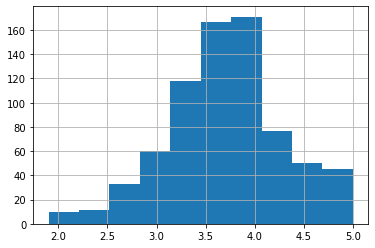

In [85]:
df.Rating.hist()

<AxesSubplot:>

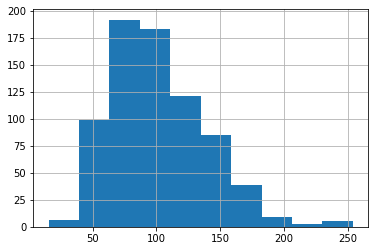

In [86]:
df['Avg Salary'].hist()

<AxesSubplot:>

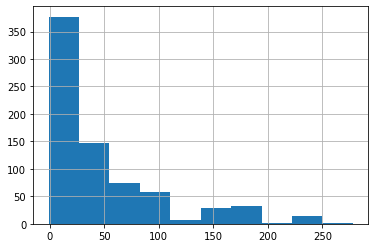

In [87]:
df['Age of Company'].hist()

<AxesSubplot:>

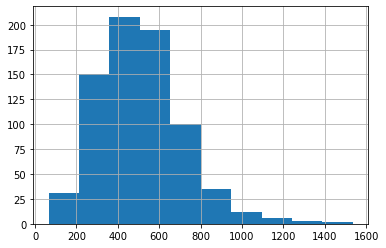

In [88]:
df.Description_Length.hist()

<AxesSubplot:>

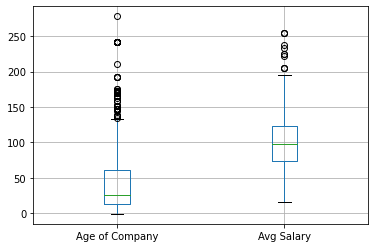

In [89]:
df.boxplot(column=['Age of Company','Avg Salary'])

<AxesSubplot:>

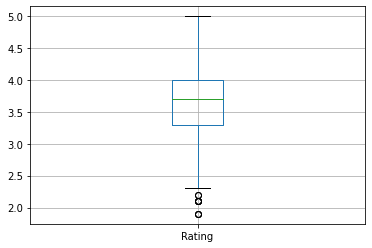

In [90]:
df.boxplot(column=['Rating'])